In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install torch torchaudio librosa transformers matplotlib soundfile


Sample Rate: 16000
Duration (sec): 4.5001875


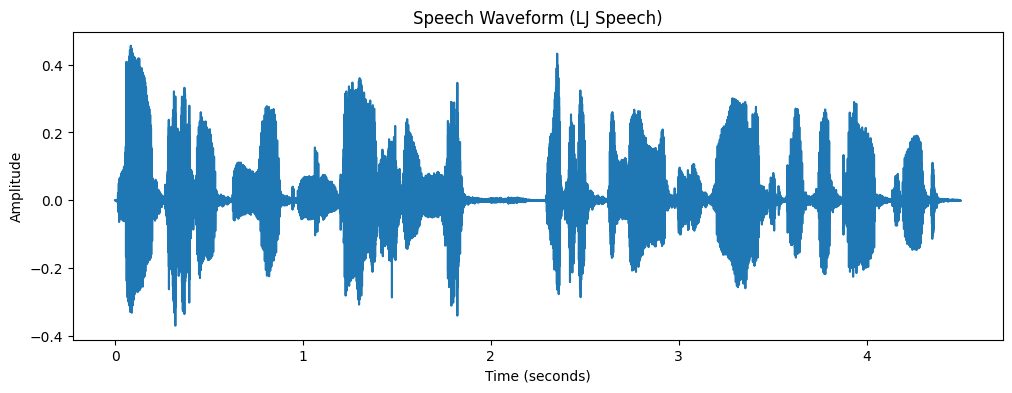

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Recognized Phonemes / Tokens:
MADE CERTAIN RECOMMENDATIONS WHICH IT BELIEVES WOULD IF ADOPTED
Approx time per phoneme (sec): 0.020090122767857144


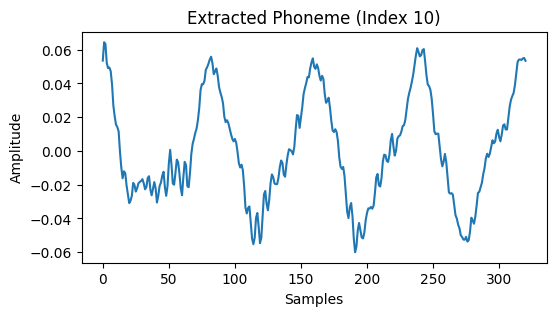

In [8]:
import torch
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

audio_path = "/content/drive/MyDrive/Speech-2/LJ050-0274.wav"

signal, sr = librosa.load(audio_path, sr=16000, mono=True)

print("Sample Rate:", sr)
print("Duration (sec):", len(signal)/sr)

time = np.arange(len(signal)) / sr

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.title("Speech Waveform (LJ Speech)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

inputs = processor(signal, sampling_rate=sr, return_tensors="pt", padding=True)

with torch.no_grad():
    logits = model(inputs.input_values).logits

predicted_ids = torch.argmax(logits, dim=-1)
phonemes = processor.batch_decode(predicted_ids)

print("Recognized Phonemes / Tokens:")
print(phonemes[0])

num_tokens = predicted_ids.shape[1]
total_duration = len(signal) / sr

time_per_token = total_duration / num_tokens
print("Approx time per phoneme (sec):", time_per_token)

# Example: extract phoneme at index 10
phoneme_index = 10

start_time = phoneme_index * time_per_token
end_time = (phoneme_index + 1) * time_per_token

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)

phoneme_signal = signal[start_sample:end_sample]

plt.figure(figsize=(6,3))
plt.plot(phoneme_signal)
plt.title(f"Extracted Phoneme (Index {phoneme_index})")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

sf.write("extracted_phoneme.wav", phoneme_signal, sr)

